In [1]:
import requests

In [305]:
LEAGUE_ID = 85647
PAGE_ID = 1
GW = 5
PLAYER_ID = 18103
PAGE_COUNT = 1

gw_url= f"https://fantasy.premierleague.com/api/event/{GW}/live/"
fixture_url = 'https://fantasy.premierleague.com/api/fixtures/'
transfer_url = f'https://fantasy.premierleague.com/api/entry/{PLAYER_ID}/transfers/'
history_url = "https://fantasy.premierleague.com/api/entry/{}/history/" #{} = PLAYER_ID
h2h_league = f"https://fantasy.premierleague.com/api/leagues-h2h-matches/league/{LEAGUE_ID}/"

#You can access members of your leagues with this code
league_url = "https://fantasy.premierleague.com/api/leagues-classic/{}/standings/?page_standings={}"
#?page_new_entries=1&page_standings={page_id}&phase=2"

#with the main api, You can access players, teams, fixtures, phases of the game. Use json.keys() to Dictionary of elements
FPL_url = "https://fantasy.premierleague.com/api/bootstrap-static/"

#Access Entry picks with the team_id
fpl_player = "https://fantasy.premierleague.com/api/entry/{}/event/{}/picks/" #corresponds to player_id and gameweek

r = requests.get(fpl_player)
json = r.json()
json.keys()

JSONDecodeError: Expecting value: line 2 column 1 (char 1)

In [ ]:
old_player_entries = []
event = 1
#gather old team elements

while event <= 8:
    for id in entries_df['entry']: 
        print(fpl_player.format(id, event))
        r = requests.get(fpl_player.format(id, event))
        obj = r.json()

        team_list = {'players': []}
        if r.status_code == 200:
            for item in obj['picks']:
                if item['is_captain']:
                    team_list['captain'] = int(item['element'])
                elif item['is_vice_captain']:
                    team_list['vice_captain'] = int(item['element'])
                team_list['players'].append(item['element'])
        
        team_list['gw'] = event
        team_list['entry'] = id
        old_player_entries.append(team_list)
    event += 1
    print('moving on to the next event'.format(event))

In [329]:
import pandas as pd
import json

old_df = pd.DataFrame(old_player_entries)

with open('old_player_entries.json', 'w') as outs:
    json.dump(old_df.to_dict(), outs)

In [339]:
alist = old_df[old_df['entry'] == 18103][['players', 'captain', 'vice_captain']]
alist

#Find common elements

,players,captain,vice_captain
37,"[263, 5, 131, 398, 12, 226, 396, 143, 60, 28, ...",355.0,19.0
189,"[28, 195, 131, 36, 12, 226, 396, 143, 19, 263,...",355.0,60.0
341,"[263, 195, 131, 36, 12, 108, 396, 143, 60, 28,...",355.0,19.0
493,"[263, 195, 131, 519, 12, 19, 396, 143, 60, 28,...",355.0,108.0
645,"[28, 195, 36, 519, 12, 19, 108, 396, 60, 263, ...",355.0,504.0
797,"[101, 405, 131, 508, 19, 108, 373, 599, 343, 5...",355.0,308.0
949,"[524, 519, 131, 36, 599, 108, 308, 664, 343, 1...",355.0,373.0
1101,"[524, 519, 36, 220, 108, 664, 599, 373, 343, 1...",308.0,355.0


In [334]:
count = 0
print("length of list is {}".format(len(alist[0])))
for i in alist[0]:
    if i in alist[1]:
        count += 1
        print("{} -{}".format(count, i))

length of list is 13
1 -263
2 -131
3 -398
4 -12
5 -226
6 -396
7 -143
8 -28
9 -36
10 -160
11 -466


In [323]:
from nltk.probability import FreqDist

ModuleNotFoundError: No module named 'nltk'

In [ ]:
## write function or script to do this weekly

In [211]:
has_next = True
entries = []

while has_next:
    obj = requests.get(league_url.format(LEAGUE_ID, PAGE_COUNT))
    obj =obj.json()
    entries.extend(obj['standings']['results'])
    has_next = obj['standings']['has_next']
    PAGE_COUNT += 1

https://fantasy.premierleague.com/api/leagues-classic/85647/standings/?page_standings=1
[{'id': 86607539, 'event_total': 63, 'player_name': 'Abdulakeem Tijani', 'rank': 1, 'last_rank': 0, 'rank_sort': 1, 'total': 518, 'entry': 6380329, 'entry_name': 'Lonely At the Top'}, {'id': 2830942, 'event_total': 48, 'player_name': 'Star Boy', 'rank': 2, 'last_rank': 1, 'rank_sort': 2, 'total': 508, 'entry': 456141, 'entry_name': 'Akaza Dono'}, {'id': 32699232, 'event_total': 49, 'player_name': 'Gaji Malik', 'rank': 3, 'last_rank': 2, 'rank_sort': 3, 'total': 504, 'entry': 4275778, 'entry_name': 'malik'}, {'id': 31621846, 'event_total': 63, 'player_name': 'Progress Akintade', 'rank': 4, 'last_rank': 7, 'rank_sort': 4, 'total': 502, 'entry': 4145862, 'entry_name': 'PROGRESSS'}, {'id': 40964739, 'event_total': 60, 'player_name': 'Olaoluwa Adenuga', 'rank': 5, 'last_rank': 4, 'rank_sort': 5, 'total': 502, 'entry': 890194, 'entry_name': 'lao'}, {'id': 2830994, 'event_total': 58, 'player_name': 'Uncle 

In [219]:
obj

{'new_entries': {'has_next': False, 'page': 1, 'results': []},
 'last_updated_data': '2023-10-08T18:31:05Z',
 'league': {'id': 85647,
  'name': 'Downtown',
  'created': '2023-07-05T22:55:01.937622Z',
  'closed': False,
  'max_entries': None,
  'league_type': 'x',
  'scoring': 'c',
  'admin_entry': 98120,
  'start_event': 1,
  'code_privacy': 'p',
  'has_cup': True,
  'cup_league': None,
  'rank': None},
 'standings': {'has_next': False,
  'page': 4,
  'results': [{'id': 69181256,
    'event_total': 58,
    'player_name': 'Adebayo Omodara',
    'rank': 151,
    'last_rank': 151,
    'rank_sort': 151,
    'total': 318,
    'entry': 8132513,
    'entry_name': 'Wappy FC'},
   {'id': 69685826,
    'event_total': 24,
    'player_name': 'Omoniyi Temytope Omotosho',
    'rank': 152,
    'last_rank': 150,
    'rank_sort': 152,
    'total': 312,
    'entry': 8185793,
    'entry_name': 'OGN FC'}]}}

In [218]:
import pandas as pd
entries_df = pd.DataFrame(entries)
entries_df
#Add Transfers in and transfers out
#Rollback weeks 
#Add Team value

#player - wise
#league differentials


,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,86607539,63,Abdulakeem Tijani,1,0,1,518,6380329,Lonely At the Top
1,2830942,48,Star Boy,2,1,2,508,456141,Akaza Dono
2,32699232,49,Gaji Malik,3,2,3,504,4275778,malik
3,31621846,63,Progress Akintade,4,7,4,502,4145862,PROGRESSS
4,40964739,60,Olaoluwa Adenuga,5,4,5,502,890194,lao
...,...,...,...,...,...,...,...,...,...
147,62782005,31,Ayodeji kayode Olajiga,148,145,148,344,7487838,OAK RANGERS
148,76965844,46,Oluwatoby Olu-Awakan,149,148,149,339,8910966,godSlayer
149,68552197,40,adams jimoh,150,149,150,331,8064967,JOSÉ FC
150,69181256,58,Adebayo Omodara,151,151,151,318,8132513,Wappy FC


<Axes: >

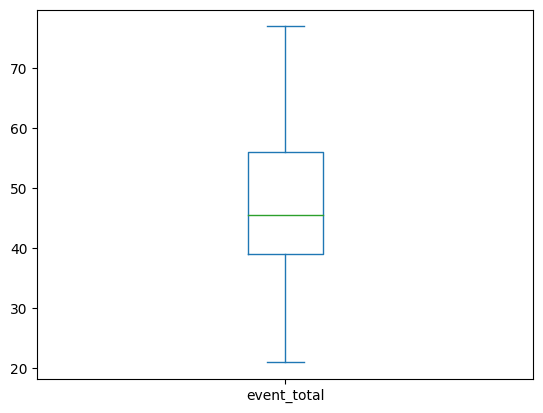

In [217]:
#plots

entries_df['event_total'].plot(kind = 'box')

In [273]:
import pandas as pd
past = []

for player_id in entries_df['entry']:
    
    #print(history_url.format(player_id))
    r = requests.get(history_url.format(player_id))
    r = r.json()
    
    #print(r.keys())
    temp_df = pd.DataFrame(r['current'])
    temp_df['id'] = player_id
    past.extend(temp_df.to_dict(orient='records'))
    

In [291]:
past_df = pd.DataFrame(past)
past_df.rename(columns={'id':'entry'},inplace= True)
past_df = past_df.merge(entries_df[['entry', 'entry_name', 'player_name']], on = 'entry', how= 'inner')
past_df

past_df[past_df['event'] == 5].sort_values(by= 'points_on_bench', ascending= False)

,event,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench,entry,entry_name,player_name
508,5,39,289,7309542,7342177,1921548,13,997,2,0,28,5332148,Hakuna mArteta,ayodeji kingsley
924,5,31,241,9255251,9278814,6415983,2,1004,0,0,20,3395657,Awes⚽me�,Promise Okonkwo
780,5,43,258,5289535,5453511,5142455,5,992,0,0,19,8016921,BLESSED,Sunday Emmanuel
628,5,60,278,494770,497191,3114470,2,996,2,0,19,1614328,Jega FC,Peace Ishola
996,5,42,211,6167773,6168461,7745910,2,999,7,20,16,5937014,Rungu urghhh,Jerome E.A.U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,5,52,274,2058506,2089398,3561574,8,1001,2,0,0,6372939,Reclaim our Mandate,Governor Governor
756,5,64,253,166693,177144,5553158,0,992,0,0,0,5234860,Obi-wan kenobi,alvin bankole
828,5,56,256,1108865,1109053,5341096,0,994,4,8,0,1028166,REGN1500,Ayomide Komolafe
836,5,45,265,4744961,4767397,4496504,37,1001,2,0,0,3239702,Masterclass FC,Victor Adesola


## PLOTS

## EXPLORE

In [ ]:
json['current']
    
#'summary_event_points1'
#'player_first_name',
#'player_last_name'
#'summary_overall_rank'
#'summary_overall_points'
#'current_event' =8

In [177]:
import pprint
lg = requests.get(league_url.format("85647", 1))
pprint.pprint(lg.json())

{'last_updated_data': '2023-10-08T18:31:05Z',
 'league': {'admin_entry': 98120,
            'closed': False,
            'code_privacy': 'p',
            'created': '2023-07-05T22:55:01.937622Z',
            'cup_league': None,
            'has_cup': True,
            'id': 85647,
            'league_type': 'x',
            'max_entries': None,
            'name': 'Downtown',
            'rank': None,
            'scoring': 'c',
            'start_event': 1},
 'new_entries': {'has_next': False, 'page': 1, 'results': []},
 'standings': {'has_next': True,
               'page': 1,
               'results': [{'entry': 6380329,
                            'entry_name': 'Lonely At the Top',
                            'event_total': 63,
                            'id': 86607539,
                            'last_rank': 0,
                            'player_name': 'Abdulakeem Tijani',
                            'rank': 1,
                            'rank_sort': 1,
                       

In [126]:
lg.json() ['standings']

{'has_next': True,
 'page': 1,
 'results': [{'id': 86607539,
   'event_total': 63,
   'player_name': 'Abdulakeem Tijani',
   'rank': 1,
   'last_rank': 0,
   'rank_sort': 1,
   'total': 518,
   'entry': 6380329,
   'entry_name': 'Lonely At the Top'},
  {'id': 2830942,
   'event_total': 48,
   'player_name': 'Star Boy',
   'rank': 2,
   'last_rank': 1,
   'rank_sort': 2,
   'total': 508,
   'entry': 456141,
   'entry_name': 'Akaza Dono'},
  {'id': 32699232,
   'event_total': 49,
   'player_name': 'Gaji Malik',
   'rank': 3,
   'last_rank': 2,
   'rank_sort': 3,
   'total': 504,
   'entry': 4275778,
   'entry_name': 'malik'},
  {'id': 31621846,
   'event_total': 63,
   'player_name': 'Progress Akintade',
   'rank': 4,
   'last_rank': 7,
   'rank_sort': 4,
   'total': 502,
   'entry': 4145862,
   'entry_name': 'PROGRESSS'},
  {'id': 40964739,
   'event_total': 60,
   'player_name': 'Olaoluwa Adenuga',
   'rank': 5,
   'last_rank': 4,
   'rank_sort': 5,
   'total': 502,
   'entry': 890194,

In [121]:
##element id - name
##position - word position
item = lg.json() ['standings']['results']
print(len(item), item)

50 [{'id': 86607539, 'event_total': 63, 'player_name': 'Abdulakeem Tijani', 'rank': 1, 'last_rank': 0, 'rank_sort': 1, 'total': 518, 'entry': 6380329, 'entry_name': 'Lonely At the Top'}, {'id': 2830942, 'event_total': 48, 'player_name': 'Star Boy', 'rank': 2, 'last_rank': 1, 'rank_sort': 2, 'total': 508, 'entry': 456141, 'entry_name': 'Akaza Dono'}, {'id': 32699232, 'event_total': 49, 'player_name': 'Gaji Malik', 'rank': 3, 'last_rank': 2, 'rank_sort': 3, 'total': 504, 'entry': 4275778, 'entry_name': 'malik'}, {'id': 31621846, 'event_total': 63, 'player_name': 'Progress Akintade', 'rank': 4, 'last_rank': 7, 'rank_sort': 4, 'total': 502, 'entry': 4145862, 'entry_name': 'PROGRESSS'}, {'id': 40964739, 'event_total': 60, 'player_name': 'Olaoluwa Adenuga', 'rank': 5, 'last_rank': 4, 'rank_sort': 5, 'total': 502, 'entry': 890194, 'entry_name': 'lao'}, {'id': 2830994, 'event_total': 58, 'player_name': 'Uncle Buzzey', 'rank': 6, 'last_rank': 6, 'rank_sort': 6, 'total': 497, 'entry': 293449, 'e

In [10]:
lg = lg.json()
LEAGUE_NAME = lg['league']['name']


In [50]:
item = lg['standings']['results']
print(len(item))
all_ = []
for team in item:
    teams = {}
    teams['team_name'] = (team['entry_name'])
    teams['id'] = team['entry']
    teams['player_name'] = team['player_name']
    all_.append(teams)
    ## team rank, week points 

50


In [311]:
entries_df

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,86607539,63,Abdulakeem Tijani,1,0,1,518,6380329,Lonely At the Top
1,2830942,48,Star Boy,2,1,2,508,456141,Akaza Dono
2,32699232,49,Gaji Malik,3,2,3,504,4275778,malik
3,31621846,63,Progress Akintade,4,7,4,502,4145862,PROGRESSS
4,40964739,60,Olaoluwa Adenuga,5,4,5,502,890194,lao
...,...,...,...,...,...,...,...,...,...
147,62782005,31,Ayodeji kayode Olajiga,148,145,148,344,7487838,OAK RANGERS
148,76965844,46,Oluwatoby Olu-Awakan,149,148,149,339,8910966,godSlayer
149,68552197,40,adams jimoh,150,149,150,331,8064967,JOSÉ FC
150,69181256,58,Adebayo Omodara,151,151,151,318,8132513,Wappy FC


In [317]:
all_

import json
id_list = {id:name for id, name in zip(entries_df['entry'], entries_df['player_name'])}

#create object relationship
with open('downtown_players.json', 'w') as out:
    json.dump(id_list, out)

#extracted only 50

In [90]:
lg['standings']

{'has_next': True,
 'page': 1,
 'results': [{'id': 86607539,
   'event_total': 63,
   'player_name': 'Abdulakeem Tijani',
   'rank': 1,
   'last_rank': 0,
   'rank_sort': 1,
   'total': 518,
   'entry': 6380329,
   'entry_name': 'Lonely At the Top'},
  {'id': 2830942,
   'event_total': 48,
   'player_name': 'Star Boy',
   'rank': 2,
   'last_rank': 1,
   'rank_sort': 2,
   'total': 508,
   'entry': 456141,
   'entry_name': 'Akaza Dono'},
  {'id': 32699232,
   'event_total': 49,
   'player_name': 'Gaji Malik',
   'rank': 3,
   'last_rank': 2,
   'rank_sort': 3,
   'total': 504,
   'entry': 4275778,
   'entry_name': 'malik'},
  {'id': 31621846,
   'event_total': 63,
   'player_name': 'Progress Akintade',
   'rank': 4,
   'last_rank': 7,
   'rank_sort': 4,
   'total': 502,
   'entry': 4145862,
   'entry_name': 'PROGRESSS'},
  {'id': 40964739,
   'event_total': 60,
   'player_name': 'Olaoluwa Adenuga',
   'rank': 5,
   'last_rank': 4,
   'rank_sort': 5,
   'total': 502,
   'entry': 890194,

In [135]:
queue = []

import time
import pandas as pd

def get_participant_json(item, url = url_2):
    r = requests.get(url.format(item))
    return r.json()


Lonely At the Top


In [21]:
home = requests.get(FPL_url)
home = home.json()

In [35]:
i = 0
players = {}

for item in home['elements']:
    i += 1
    players[item['id']] = item['first_name'] +' ' + item['second_name']


In [151]:

gw = {}

def obtain_gw_score(home:dict):
    """Obtains gameweek scores of players by id"""
    assert "elements" in home.keys(), "elements not in home.keys()"
    for item in home['elements']:
        #if item['id'] == 20:
            #print(item['event_points'])
            #print(players[item['id']])
        gw.update({item['id']: item['event_points']})
    return gw

gw = obtain_gw_score(home)

In [153]:
scores = {}

In [159]:
for item in id_list.keys():
    queue.append((fpl_player.format(item)))
    print(id_list[item])
    obj = get_participant_json(item, url=fpl_player)
    player_vis = pd.DataFrame(obj['picks'])
    player_vis['Player_name'] = player_vis['element'].map(lambda x :players[x])
    player_vis['points'] = player_vis['element'].map(lambda x:gw[x])

#scores['gw8'][id_list.keys()[0]] = dict(player_vis)
    #distribute requests processing
    time.sleep(5)
    break
#player_vis['point

TypeError: 'dict_keys' object is not subscriptable

In [164]:
id_list

{'6380329': 'Lonely At the Top',
 '456141': 'Akaza Dono',
 '4275778': 'malik',
 '4145862': 'PROGRESSS',
 '890194': 'lao',
 '293449': 'Coyg',
 '3960377': 'St. Mac FC',
 '175583': 'FC Baba Chukwudi',
 '213565': 'PSABAT SC',
 '98120': 'Potters Touch',
 '3829907': 'AllOutFc',
 '483899': 'Dafuq FC',
 '6570495': 'Tommyand⚡',
 '4834604': 'Sujeyinc',
 '1086398': 'Sylarexx Fc',
 '5336861': 'Na My Year Be This',
 '1290058': 'Monkey D. Luffy',
 '6779013': 'XVI FC',
 '3185253': 'Chiller FC',
 '3968042': 'Danjoe FC',
 '7572179': 'Ragner Fc',
 '4691088': 'Tretiy Esminets',
 '6195467': 'TEAM OYEE',
 '624695': 'tosindoks FC',
 '150479': 'Keins’ Stars',
 '4027607': 'Corporate FC',
 '3962660': 'Differential FC',
 '1172179': 'Ravers',
 '2929610': 'Zups!',
 '1714236': 'Opsydiq FC',
 '992871': 'Odogwu FC',
 '6013821': 'Megatron fc',
 '2873232': 'Timmy United FC',
 '634702': 'Bickz14',
 '6388931': 'King in D North�',
 '669180': 'BUNMI FC',
 '1635237': 'Jaygbee FC',
 '18103': 'BEADO FC',
 '1145568': 'Falobe 

In [167]:
obj = get_participant_json('98120', url=FPL_url)
pprint.pprint(obj)

{'active_chip': None,
 'automatic_subs': [],
 'entry_history': {'bank': 18,
                   'event': 3,
                   'event_transfers': 2,
                   'event_transfers_cost': 4,
                   'overall_rank': 2213229,
                   'points': 41,
                   'points_on_bench': 7,
                   'rank': 5537014,
                   'rank_sort': 5594176,
                   'total_points': 167,
                   'value': 1006},
 'picks': [{'element': 17,
            'is_captain': False,
            'is_vice_captain': False,
            'multiplier': 1,
            'position': 1},
           {'element': 405,
            'is_captain': False,
            'is_vice_captain': False,
            'multiplier': 1,
            'position': 2},
           {'element': 20,
            'is_captain': False,
            'is_vice_captain': False,
            'multiplier': 1,
            'position': 3},
           {'element': 511,
            'is_captain': False,
         

In [36]:
import json

with open('epl_players.json', 'w') as outs:
    json.dump(players, outs)

In [40]:
#home['events'] - information on each gameweek, an aggregate of stats
pprint.pprint(home['events'])

[{'average_entry_score': 64,
  'chip_plays': [{'chip_name': 'bboost', 'num_played': 163222},
                 {'chip_name': '3xc', 'num_played': 287198}],
  'cup_leagues_created': False,
  'data_checked': True,
  'deadline_time': '2023-08-11T17:30:00Z',
  'deadline_time_epoch': 1691775000,
  'deadline_time_game_offset': 0,
  'finished': True,
  'h2h_ko_matches_created': False,
  'highest_score': 127,
  'highest_scoring_entry': 3383750,
  'id': 1,
  'is_current': False,
  'is_next': False,
  'is_previous': False,
  'most_captained': 355,
  'most_selected': 355,
  'most_transferred_in': 1,
  'most_vice_captained': 19,
  'name': 'Gameweek 1',
  'top_element': 395,
  'top_element_info': {'id': 395, 'points': 14},
  'transfers_made': 0},
 {'average_entry_score': 44,
  'chip_plays': [{'chip_name': 'bboost', 'num_played': 126778},
                 {'chip_name': 'freehit', 'num_played': 112568},
                 {'chip_name': 'wildcard', 'num_played': 244166},
                 {'chip_name': '3